#### Decision Trees

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris =  load_iris(as_frame = True)

In [3]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
X_iris = iris.data[['petal length (cm)','petal width (cm)']]
y_iris = iris.target

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
tree_clf.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [7]:
from sklearn.tree import export_graphviz

IMAGES_PATH = 'images/'

export_graphviz(
        tree_clf,
        out_file=str("images/iris_tree.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

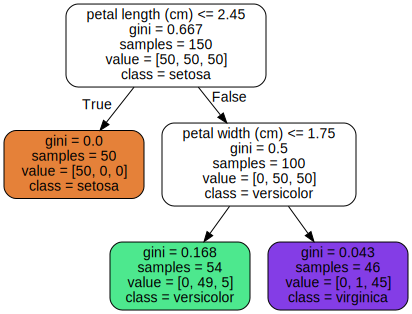

In [8]:
from graphviz import Source

Source.from_file("images/iris_tree.dot")  # path differs in the book

In [9]:
list(enumerate(zip(iris.target_names, ("yo", "bs", "g^"))))

[(0, (np.str_('setosa'), 'yo')),
 (1, (np.str_('versicolor'), 'bs')),
 (2, (np.str_('virginica'), 'g^'))]

/home/chandrakanth/Courses/PYTHON_AI_OPENAI_NOV_2024/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


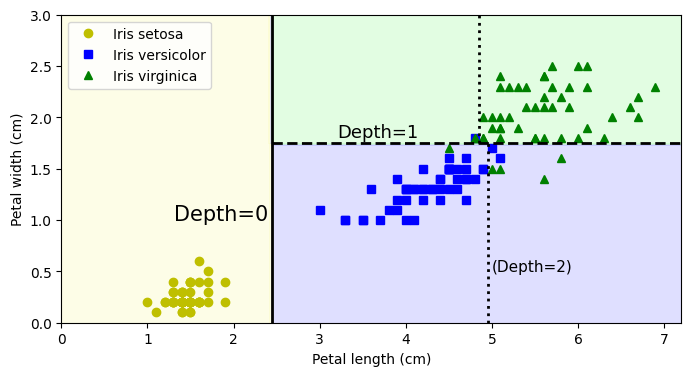

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris.iloc[:, 0][y_iris == idx], X_iris.iloc[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
# save_fig("decision_tree_decision_boundaries_plot")

plt.show()

In [ ]:
1-(50/50)

0.0

In [ ]:
gini_impurity_index = 1 - ((0/54)**2) - ((49/54)**2) - ((5/54)**2)

In [ ]:
g_imp_virginica = 1 - ((0/45)**2) - ((1/45)**2) - ((44/45)**2)

In [ ]:
g_imp_virginica

0.04345679012345682

In [ ]:
tree_clf.predict_proba([[5,1.5]]).round()

/home/chandrakanth/Courses/PYTHON_AI_OPENAI_NOV_2024/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1., 0.]])

#### Regression Trees

In [12]:
import numpy as np


In [13]:
np.random.seed(42)

X_quad = np.random.rand(200,1) - 0.5

y_quad =  X_quad ** 2 / 0.25 * np.random.rand(200,1)

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
tree_regressor = DecisionTreeRegressor(max_depth=2, 
                                        random_state=42)

In [16]:
tree_regressor.fit(X_quad,y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

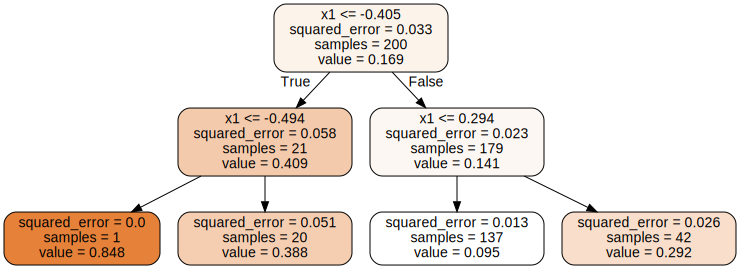

In [17]:
# extra code – we've already seen how to use export_graphviz()
export_graphviz(
    tree_regressor,
    out_file=str("images/regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file("images/regression_tree.dot")

In [18]:
from sklearn.metrics import root_mean_squared_error


In [19]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [21]:
tree_regressor.tree_.threshold

array([-0.40461257, -0.49376287, -2.        , -2.        ,  0.29368646,
       -2.        , -2.        ])

In [22]:
tree_reg2.tree_.threshold

array([-0.40461257, -0.49376287, -2.        , -0.41726379, -2.        ,
       -2.        ,  0.29368646, -0.24163919, -2.        , -2.        ,
        0.47084597, -2.        , -2.        ])

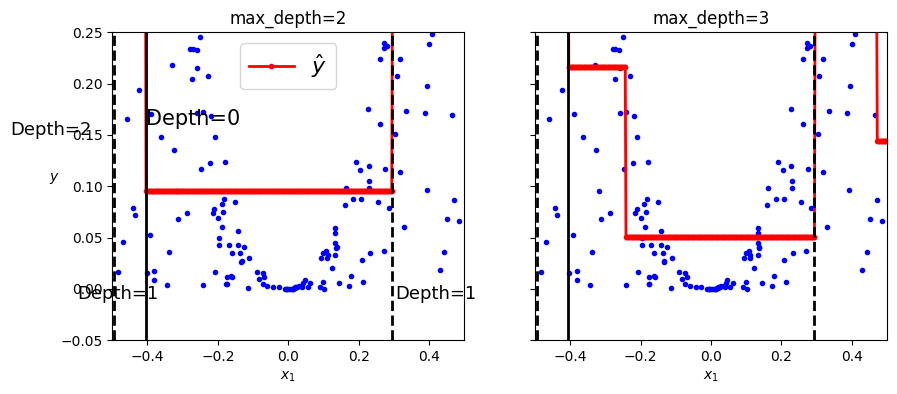

In [24]:
# extra code – this cell generates and saves Figure 6–5

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_regressor, X_quad, y_quad)

th0, th1a, th1b = tree_regressor.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

# save_fig("tree_regression_plot")
plt.show()